# Linear Regression

In [2]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [253]:
df = pd.read_csv('Book1.csv')
area = df[['area']]
price = df['price']

In [254]:
reg = linear_model.LinearRegression()
reg.fit(area,price)
predictedprice = reg.predict(area)

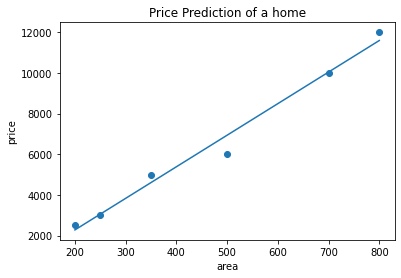

In [255]:
plt.scatter(area,price)
plt.title('Price Prediction of a home')
plt.xlabel('area')
plt.ylabel('price')
plt.plot(area,predictedprice)
plt.show()

In [256]:
reg.coef_ #the value of m

array([15.53072626])

In [257]:
reg.intercept_ #the value of b

-831.0055865921759

In [258]:
r2_score(price,predictedprice) #how much our model is accurate

0.9829349799524965

In [259]:
reg.predict([[260]])

array([3206.98324022])

# Multiple Variable

In [260]:
df = pd.read_csv('multiplevariable.csv')
df

,area,age,bedrooms,price
0,200,10,2.0,2500
1,250,12,5.0,3000
2,350,15,8.0,5000
3,500,30,NaN,6000
4,700,32,10.0,10000
5,800,35,12.0,12000


In [261]:
import math
bedroom = math.floor(df.bedrooms.mean())
bedroom

7

In [262]:
df.bedrooms = df.bedrooms.fillna(bedroom)

In [263]:
features = df[['area','age','bedrooms']]
price = df.price

In [264]:
reg = linear_model.LinearRegression()

In [265]:
reg.fit(features,price)
reg.predict([[230,23,12]])

array([821.07737137])

In [266]:
reg.coef_

array([  22.79457097, -158.98704087,  -20.33202975])

In [267]:
reg.intercept_

-520.9876543209848

# Gradient Descent

In [268]:
def gradientDescent(x,y):
    m = b = 0
    n = len(x)
    learning_rate = 0.07
    iterations = 1000
    for i in range(iterations):
        y_predicted = m*x + b
        cost = (1/n)*sum((y-y_predicted)**2)
        m_derivative = -(2/n)*sum((x*(y-y_predicted)))
        b_derivative = -(2/n)*sum(y-y_predicted)
        m = m - learning_rate*m_derivative
        b = b - learning_rate*b_derivative
        print('m value : {} b value : {} and cost : {}'.format(m,b,cost))
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])
gradientDescent(x,y)

m value : 4.340000000000001 b value : 1.2600000000000002 and cost : 89.0
m value : 1.4671999999999992 b value : 0.5207999999999996 and cost : 38.82960000000004
m value : 3.328976000000001 b value : 1.0916640000000002 and cost : 17.194573440000028
m value : 2.083854079999999 b value : 0.8006611199999998 and cost : 7.852899119616018
m value : 2.878441126400001 b value : 1.0733498496000002 and cost : 3.807896852794995
m value : 2.3348348549119993 b value : 0.9741355975679997 and cost : 2.0455353703196275
m value : 2.6700522273689606 b value : 1.11712597484544 and cost : 1.2674046781862842
m value : 2.4289788877856764 b value : 1.0993064028721151 and cost : 0.9141408495650529
m value : 2.5666427113894463 b value : 1.185232373600035 and cost : 0.7447433460834745
m value : 2.456215338937684 b value : 1.2013099025124625 and cost : 0.655356033717585
m value : 2.5090935579184164 b value : 1.2615160738068905 and cost : 0.6012027822872151
m value : 2.4552527277251612 b value : 1.291084529148191 a

# Save a model

In [269]:
import pickle
with open('model_pickle','wb') as f: #to save the model
    pickle.dump(reg,f)

In [270]:
with open('model_pickle','rb') as f: # to use the model
     model = pickle.load(f)

In [271]:
model.predict([[230,12,5]])

array([2712.25902922])

In [272]:
import joblib
joblib.dump(reg,'model_joblib')

['model_joblib']

In [273]:
model = joblib.load('model_joblib')

In [274]:
model.predict([[230,12,5]])

array([2712.25902922])

# One Hot Encoding

In [275]:
df = pd.read_csv('onehotencoding.csv')

In [276]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [277]:
new_df = pd.concat([df,dummies],axis='columns')
new_df

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [278]:
final_df = new_df.drop(['town','west windsor'],axis='columns')
final_df

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [279]:
y = final_df['price']
x = final_df.drop(['price'],axis='columns')
model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [280]:
model.predict([[2800,0,1]]) #predict the price of 2800 sqft area a home in robinsville

array([590775.63964739])

In [281]:
model.predict([[3400,0,0]]) #predict the price of 3400 sqft area a home in west windsor 

array([681241.66845839])

In [282]:
model.score(x,y) #how much my model is accurate

0.9573929037221873

# Train and Test Set

In [283]:
df = pd.read_csv('carprises.csv')
df

,Car Model,Mileage,Sell Price,Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


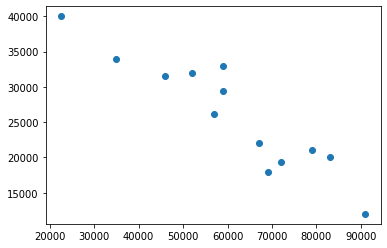

In [284]:
plt.scatter(df.Mileage,df['Sell Price'])

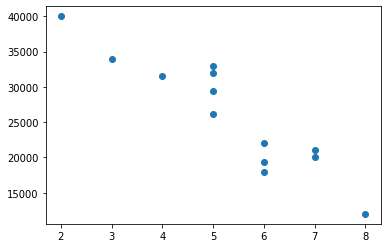

In [285]:
plt.scatter(df['Age(yrs)'],df['Sell Price'])

In [286]:
x = df[['Mileage','Age(yrs)']]
y = df['Sell Price']

In [287]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)  #random_state actually select the same value for x_train,y_train,x_test,y_test each time when we run it

In [288]:
model.fit(x_train,y_train)

LinearRegression()

In [289]:
model.predict(x_test)

array([41842.49106079, 22531.68057211, 18423.93325387])

In [290]:
model.score(x_test,y_test)

0.9224816911971743

# Logistic Regression : Binary Classification

In [291]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

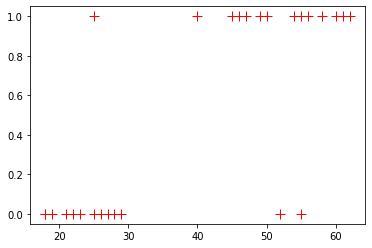

In [292]:
df = pd.read_csv('insurance.csv')
plt.plot(df.age,df.bought_insurance,'+r',markersize=10)

In [293]:
x = df[['age']]
y = df['bought_insurance']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [294]:
model = linear_model.LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [295]:
model.predict(x_test)

array([1, 1, 0, 0, 0, 0], dtype=int64)

In [296]:
model.score(x_test,y_test)

1.0

In [297]:
model.predict_proba(x_test)

array([[0.07149888, 0.92850112],
       [0.10786116, 0.89213884],
       [0.88695589, 0.11304411],
       [0.78084024, 0.21915976],
       [0.73981614, 0.26018386],
       [0.79952814, 0.20047186]])

# Logistic Regression : Multiclass Classification

In [298]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [299]:
np.shape(digits.images)

(1797, 8, 8)

In [300]:
def showall(index):
    plt.gray()
    plt.matshow(digits.images[index])
    print('Data : ',digits.data[index])
    print('Images : ',digits.images[index])
    print('Target : ',digits.target[index])
    print('Target_names :',digits.target_names[index])
    print('DESCRIPTION :',digits.DESCR[index])

Data :  [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Images :  [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Target :  0
Target_names : 0
DESCRIPTION : .


<Figure size 432x288 with 0 Axes>

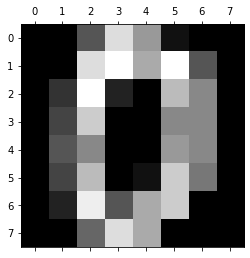

In [301]:
showall(0)

In [302]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2,random_state=10)

In [303]:
model = LogisticRegression()
model.fit(x_train,y_train)

c:\users\kousi\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [304]:
model.score(x_test,y_test)

0.95

In [305]:
y_predicted = model.predict(x_test)
y_predicted

array([5, 2, 5, 4, 8, 2, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 8,
       6, 7, 8, 8, 5, 2, 5, 9, 3, 3, 7, 3, 4, 1, 9, 2, 7, 4, 2, 1, 0, 9,
       2, 3, 6, 1, 9, 4, 4, 5, 8, 4, 8, 5, 9, 7, 8, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 4, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 1, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 5, 4, 6, 0, 8, 8, 1, 2, 7, 9, 8, 5, 2, 3, 3, 8, 7, 6,
       2, 5, 4, 3, 3, 7, 6, 7, 2, 7, 4, 9, 5, 1, 9, 4, 6, 1, 1, 1, 4, 0,
       8, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 5, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 9, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
       0, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 4, 5, 6, 1, 6, 7, 0, 8, 6, 2, 0, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 1, 6, 2, 2, 0, 8, 4, 7, 3, 3,

In [306]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  1,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 38,  0,  1,  0,  0,  0,  0],
       [ 1,  1,  0,  0, 31,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 30,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  1],
       [ 0,  0,  1,  0,  0,  0,  1,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 36]], dtype=int64)

Text(69.0, 0.5, 'Truth')

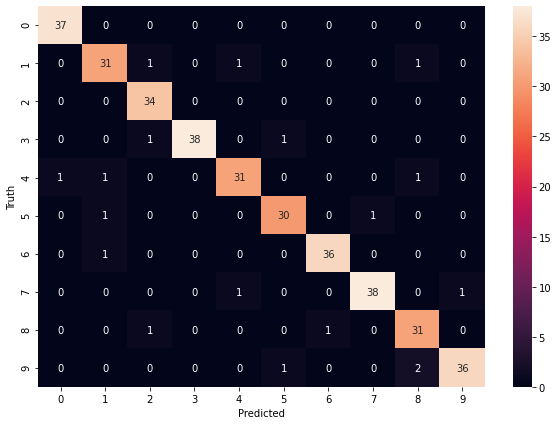

In [307]:
import seaborn as sn #this is for the confusion matrix visualization
plt.figure(figsize = (10,7)) #at first column my model is predicted for 1 times that the given data is 0 but in truth the data is 4
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [308]:
len(y_test)

360

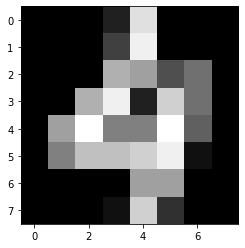

In [309]:
plt.imshow(x_test[3].reshape(8,8))

# Decision Tree

In [351]:
df = pd.read_csv('titanic.csv')
np.shape(df)

(891, 12)

In [352]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [353]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [354]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [355]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace = True)
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [356]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [357]:
target = df.Survived
inputs = df.drop('Survived',axis='columns')
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [358]:
inputs.Sex = inputs.Sex.map({'male':0,'female':1}) #this is one type of label encoding
inputs

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500
...,...,...,...,...
886,2,0,27.0,13.0000
887,1,1,19.0,30.0000
888,3,1,NaN,23.4500
889,1,0,26.0,30.0000


In [333]:
from sklearn.preprocessing import LabelEncoder

In [346]:
le_sex = LabelEncoder() #this is another type of label encoding

In [347]:
inputs['sex'] = le_sex.fit_transform(inputs['Sex']) 
inputs

,Pclass,Sex,Age,Fare,sex
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1
...,...,...,...,...,...
886,2,male,27.0,13.0000,1
887,1,female,19.0,30.0000,0
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [350]:
inputs.drop('Sex',axis='columns')
inputs

,Pclass,Sex,Age,Fare,sex
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1
...,...,...,...,...,...
886,2,male,27.0,13.0000,1
887,1,female,19.0,30.0000,0
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [364]:
inputs.Age = inputs['Age'].fillna(inputs.Age.mean())
inputs

,Pclass,Sex,Age,Fare
0,3,0,22.000000,7.2500
1,1,1,38.000000,71.2833
2,3,1,26.000000,7.9250
3,1,1,35.000000,53.1000
4,3,0,35.000000,8.0500
...,...,...,...,...
886,2,0,27.000000,13.0000
887,1,1,19.000000,30.0000
888,3,1,29.699118,23.4500
889,1,0,26.000000,30.0000


In [366]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2,random_state=10)

In [375]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree = DecisionTreeClassifier()

In [376]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [377]:
dtree.score(x_test,y_test)

0.7877094972067039

In [378]:
dtree.predict(x_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

[Text(161.8342239425982, 213.25846153846155, 'X[1] <= 0.5\ngini = 0.477\nsamples = 712\nvalue = [432, 280]'),
 Text(77.49941465256798, 204.89538461538461, 'X[0] <= 1.5\ngini = 0.318\nsamples = 454\nvalue = [364, 90]'),
 Text(27.64712990936556, 196.53230769230768, 'X[3] <= 26.144\ngini = 0.465\nsamples = 98\nvalue = [62, 36]'),
 Text(24.949848942598187, 188.16923076923078, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(30.34441087613293, 188.16923076923078, 'X[3] <= 30.598\ngini = 0.482\nsamples = 89\nvalue = [53, 36]'),
 Text(20.229607250755286, 179.80615384615385, 'X[2] <= 54.0\ngini = 0.473\nsamples = 26\nvalue = [10, 16]'),
 Text(13.486404833836858, 171.44307692307692, 'X[3] <= 27.135\ngini = 0.408\nsamples = 21\nvalue = [6, 15]'),
 Text(8.091842900302115, 163.07999999999998, 'X[2] <= 31.85\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(5.394561933534743, 154.71692307692308, 'X[2] <= 28.85\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(2.6972809667673716, 146.35384615

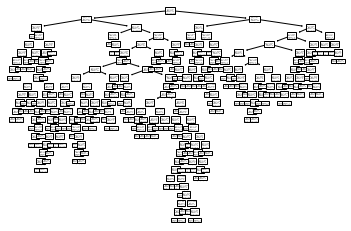

In [379]:
tree.plot_tree(dtree)

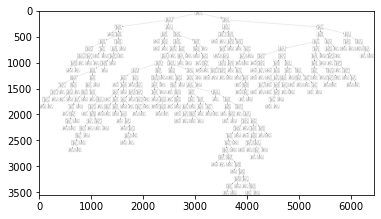

In [383]:
import pydotplus
import matplotlib.image as pltimg
features = ['Pclass','Sex','Age','Fare']
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')
img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

# Support Vector Machine

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [14]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [20]:
df['target'] = iris.target

In [22]:
df['flower_names'] = df.target.apply(lambda x : iris.target_names[x])

In [41]:
df[df['target'] == 2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica
105,7.6,3.0,6.6,2.1,2,virginica
106,4.9,2.5,4.5,1.7,2,virginica
107,7.3,2.9,6.3,1.8,2,virginica
108,6.7,2.5,5.8,1.8,2,virginica
109,7.2,3.6,6.1,2.5,2,virginica


In [42]:
df_setosa = df[df.target == 0]
df_versicolor = df[df.target == 1]
df_verginica = df[df.target == 2]

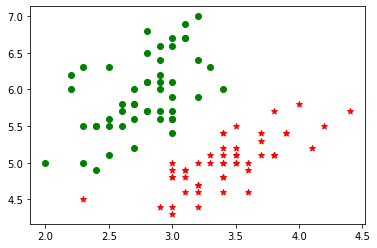

In [52]:
plt.scatter(df_setosa['sepal width (cm)'],df_setosa['sepal length (cm)'],color='red',marker='*')
plt.scatter(df_versicolor['sepal width (cm)'],df_versicolor['sepal length (cm)'],color='green',marker='o')

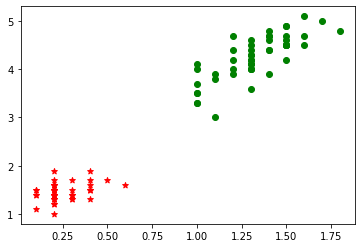

In [53]:
plt.scatter(df_setosa['petal width (cm)'],df_setosa['petal length (cm)'],color='red',marker='*')
plt.scatter(df_versicolor['petal width (cm)'],df_versicolor['petal length (cm)'],color='green',marker='o')

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
inputs = df.drop(['target','flower_names'],axis='columns')
target = df.target

In [56]:
inputs

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [60]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2,random_state=2)

In [74]:
model = SVC(kernel='poly')
model.fit(x_train,y_train)

SVC(kernel='poly')

In [75]:
model.predict(x_test)

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [76]:
model.score(x_test,y_test)

0.9666666666666667

# Random Forest Classifier

In [77]:
from sklearn.datasets import load_digits
digits = load_digits()

In [78]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [79]:
df = pd.DataFrame(digits.data)

In [81]:
df['target'] = digits.target

In [83]:
inputs = df.drop('target',axis='columns')
target = df.target

In [84]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [85]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2,random_state=2)
model.fit(x_train,y_train)

RandomForestClassifier()

In [87]:
model.score(x_test,y_test)

0.9611111111111111

In [88]:
model.predict(x_test)

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 7, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 1, 5, 7,
       9, 4, 9, 6, 1, 7, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8, 5, 7, 4, 8,
       3, 5, 8, 4, 3, 1, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4,
       6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 6, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9,
       4, 7, 0, 3, 5, 1, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 5, 1,
       0, 3, 4, 3, 0, 7, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8,
       2, 1, 8, 4, 1, 3, 1, 1, 9, 5, 4, 9, 7, 4, 8, 9, 5, 7, 6, 9, 4, 0,
       4, 0, 0, 9, 0, 6, 5, 8, 8, 3, 7, 9, 2, 0, 3, 2, 7, 3, 0, 2, 1, 5,
       2, 7, 0, 6, 9, 3, 1, 1, 3, 5, 2, 3, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5,
       9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2,
       8, 7, 3, 7, 8, 0, 9, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2,
       5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 8, 5, 5, 5, 4, 0, 1, 8, 6,
       2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9,

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model.predict(x_test))

In [92]:
cm

array([[31,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  2,  1,  1],
       [ 0,  0,  0,  0,  1, 42,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  1,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 33,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 26]], dtype=int64)

Text(69.0, 0.5, 'Truth')

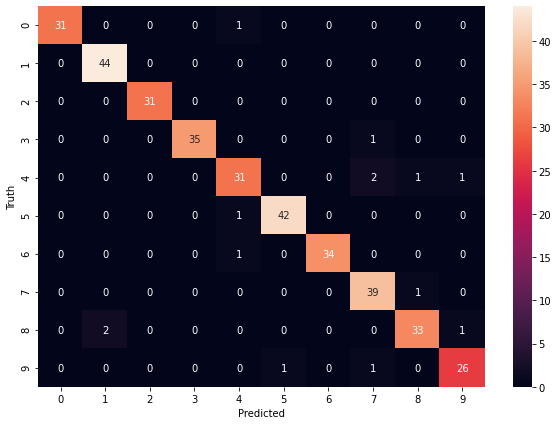

In [96]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# K-Fold Cross Validation

In [117]:
from sklearn.model_selection import KFold
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
digits = load_digits()
kf = KFold(n_splits=5)

In [118]:
for train_index,test_index in kf.split([1,2,3,4,5,6,7,8,9,8,7,9]):
    print(train_index,test_index)

[ 3  4  5  6  7  8  9 10 11] [0 1 2]
[ 0  1  2  6  7  8  9 10 11] [3 4 5]
[ 0  1  2  3  4  5  8  9 10 11] [6 7]
[ 0  1  2  3  4  5  6  7 10 11] [8 9]
[0 1 2 3 4 5 6 7 8 9] [10 11]


In [127]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [128]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold()

In [133]:
score_lr = []
score_svc = []
score_rf = []
for train_index,test_index in kf.split(digits.data):
    x_train,x_test,y_train,y_test = digits.data[train_index],digits.data[test_index],digits.target[train_index],digits.target[test_index]
    score_lr.append(get_score(LogisticRegression(),x_train,x_test,y_train,y_test))
    score_svc.append(get_score(SVC(),x_train,x_test,y_train,y_test))
    score_rf.append(get_score(RandomForestClassifier(),x_train,x_test,y_train,y_test))
print(score_lr)
print(score_svc)
print(score_rf)

c:\users\kousi\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\kousi\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

[0.9277777777777778, 0.8666666666666667, 0.9387186629526463, 0.935933147632312, 0.9080779944289693]
[0.9694444444444444, 0.9472222222222222, 0.9832869080779945, 0.9888579387186629, 0.9415041782729805]
[0.9388888888888889, 0.9138888888888889, 0.958217270194986, 0.9637883008356546, 0.9220055710306406]


In [134]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(),digits.data,digits.target)

c:\users\kousi\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\kousi\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [139]:
for x,y in kf.split(digits.data):
    print(x,y)

[ 360  361  362 ... 1794 1795 1796] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

# K-Means Clustering

In [164]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [165]:
df = pd.read_csv('income.csv')

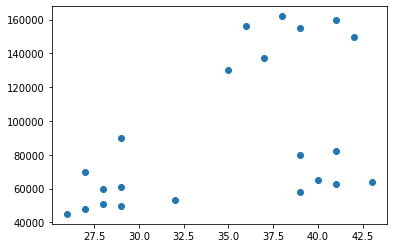

In [166]:
plt.scatter(df.Age,df.Income)

In [176]:
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [178]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age','Income']])

In [179]:
df['cluster'] = y_predicted

Text(0, 0.5, 'Age')

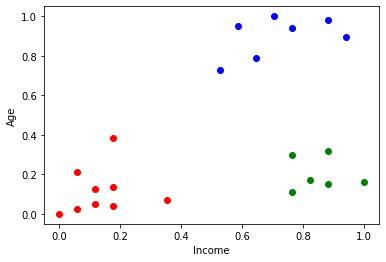

In [180]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

plt.scatter(df1.Age,df1['Income'],color='red')
plt.scatter(df2.Age,df2['Income'],color='green')
plt.scatter(df3.Age,df3['Income'],color='blue')

plt.xlabel('Income')
plt.ylabel('Age')

In [192]:
km.cluster_centers_  #this gives the centroid value for each cluster

array([[0.79411765, 0.14102564],
       [0.91176471, 0.94017094],
       [0.10084034, 0.08485958],
       [0.58823529, 0.75641026],
       [0.17647059, 0.38461538],
       [0.94117647, 0.15811966],
       [0.82352941, 0.30769231],
       [0.35294118, 0.06837607],
       [0.68627451, 0.96296296]])

In [193]:
km.inertia_  #this gives the sum of squared error

0.11073569527418643

In [195]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['Age','Income']])
    sse.append(km.inertia_)

In [194]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.26217927623452125,
 0.2105547899547249,
 0.16869711728567785,
 0.14090581089405504,
 0.11073569527418643]

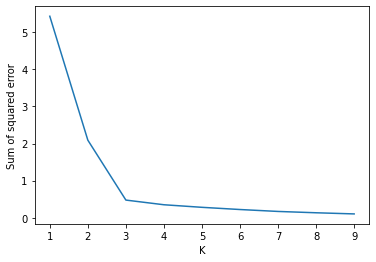

In [196]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

# Naive Bayes

In [197]:
df = pd.read_csv('titanic.csv')

In [200]:
df.drop(['PassengerId','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],inplace=True,axis='columns')

In [201]:
df

,Survived,Pclass,Name,Sex,Age
0,0,3,"Braund, Mr. Owen Harris",male,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0
...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,1,1,"Behr, Mr. Karl Howell",male,26.0


In [205]:
target = df.Survived
inputs = df.drop(['Survived','Name'],axis='columns')

In [206]:
inputs

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,NaN
889,1,male,26.0


In [208]:
sex = pd.get_dummies(inputs.Sex)

In [212]:
inputs = pd.concat([inputs,sex],axis='columns')

In [218]:
inputs.drop('Sex',axis='columns',inplace=True)

In [219]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [220]:
inputs

,Pclass,Age,female,male
0,3,22.000000,0,1
1,1,38.000000,1,0
2,3,26.000000,1,0
3,1,35.000000,1,0
4,3,35.000000,0,1
...,...,...,...,...
886,2,27.000000,0,1
887,1,19.000000,1,0
888,3,29.699118,1,0
889,1,26.000000,0,1


In [221]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [222]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2)

In [223]:
model.fit(x_train,y_train)

GaussianNB()

In [224]:
model.score(x_test,y_test)

0.7821229050279329

In [227]:
model.predict(x_test[:10])

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

# Spam Email

In [283]:
df = pd.read_csv('spam.csv')

In [284]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis='columns',inplace=True)

In [285]:
df

,Category,Msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [286]:
df.groupby('Category').describe()

Msg                                                               
         count unique                                                top freq
Category                                                                     
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [287]:
df.Category = df.Category.map({'ham':0,'spam':1})

In [288]:
df

,Category,Msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [289]:
x_train,x_test,y_train,y_test = train_test_split(df.Msg,df.Category,test_size=0.2)

In [290]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)  #convert the test in the msg to a number vector
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [291]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [295]:
email = [
    'hey mohan please give me some money it is urgent.',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward.'
]
email_count = v.transform(email)
model.predict(email_count)

array([0, 1], dtype=int64)

In [275]:
x_test_count = v.transform(x_test)
model.score(x_test_count,y_test)

0.9838565022421525

Simplified Version of the upper code

In [296]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('Vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [297]:
clf.fit(x_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [298]:
clf.score(x_test,y_test)

0.9856502242152466

In [299]:
clf.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [300]:
clf.predict(email)

array([0, 1], dtype=int64)

# Hyper Tuning

In [301]:
from sklearn.datasets import load_iris
iris = load_iris()

In [302]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [307]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [309]:
df['target'] = iris.target

In [311]:
df['flower'] = df.target.apply(lambda x:iris.target_names[x])

In [312]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [313]:
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2)

In [317]:
kernels = ['rbf','linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(SVC(kernel=kval,C=cval,gamma='auto'),iris.data,iris.target,cv = 5)
        avg_scores[kval + '-' +str(cval)] = np.average(cv_scores)
avg_scores        

{'rbf-1': 0.9800000000000001,
 'rbf-10': 0.9800000000000001,
 'rbf-20': 0.9666666666666668,
 'linear-1': 0.9800000000000001,
 'linear-10': 0.9733333333333334,
 'linear-20': 0.9666666666666666}

Same code with inbuit method

In [320]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False)
clf.fit(iris.data,iris.target)
clf.cv_results_

{'mean_fit_time': array([0.0016017 , 0.00100293, 0.00139933, 0.0012022 , 0.00120134,
        0.00099998]),
 'std_fit_time': array([4.90864031e-04, 5.54977820e-06, 4.92670829e-04, 4.00624681e-04,
        4.02117072e-04, 1.63381974e-06]),
 'mean_score_time': array([0.00099888, 0.00020013, 0.0006032 , 0.        , 0.000599  ,
        0.        ]),
 'std_score_time': array([3.63648910e-06, 4.00257111e-04, 4.92534262e-04, 0.00000000e+00,
        4.89084707e-04, 0.00000000e+00]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'ker

In [321]:
df = pd.DataFrame(clf.cv_results_)

In [322]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001602,0.000491,0.000999,0.000004,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,0.966667,0.966667,0.933333,1.0,0.966667,0.021082,5
1,0.001003,0.000006,0.000200,0.000400,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001399,0.000493,0.000603,0.000493,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.001202,0.000401,0.000000,0.000000,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.001201,0.000402,0.000599,0.000489,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
5,0.001000,0.000002,0.000000,0.000000,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.933333,1.0,0.966667,0.042164,5


In [323]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.966667
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.980000
5,20,linear,0.966667


In [324]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits

In [327]:
clf.best_score_

0.9800000000000001

In [328]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

Another method for parameter selection which does not try all combination.just try the random n_iter combination

In [330]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(SVC(),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False,n_iter=2)  #this will randomly select 2 pair as n_iter = 2

In [331]:
rs.fit(iris.data,iris.target)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=2,
                   param_distributions={'C': [1, 10, 20],
                                        'kernel': ['rbf', 'linear']})

In [332]:
df = pd.DataFrame(rs.cv_results_)

In [334]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,20,linear,0.966667
1,1,rbf,0.966667


In [335]:
rs.best_params_

{'kernel': 'linear', 'C': 20}

In [336]:
rs.best_score_

0.9666666666666666

# Best Model Selection

In [338]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [339]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.960000,{'n_estimators': 10}
2,logistic_regression,0.966667,{'C': 5}


In [348]:
for x,y in model_params.items():
    print(x)
    print(y)

svm
{'model': SVC(gamma='auto'), 'params': {'C': [1, 10, 20], 'kernel': ['rbf', 'linear']}}
random_forest
{'model': RandomForestClassifier(), 'params': {'n_estimators': [1, 5, 10]}}
logistic_regression
{'model': LogisticRegression(solver='liblinear'), 'params': {'C': [1, 5, 10]}}


In [344]:
model_params

{'svm': {'model': SVC(gamma='auto'),
  'params': {'C': [1, 10, 20], 'kernel': ['rbf', 'linear']}},
 'random_forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [1, 5, 10]}},
 'logistic_regression': {'model': LogisticRegression(solver='liblinear'),
  'params': {'C': [1, 5, 10]}}}

# L1 and L2 Regularization

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('melb_data.csv')

In [31]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [32]:
df = df[['Suburb','Rooms','Type','Method','SellerG','Distance','Bedroom2','Bathroom','Car',
       'Landsize','BuildingArea','CouncilArea','Regionname','Propertycount','Price']]

In [42]:
  df.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Regionname       0
Propertycount    0
Price            0
dtype: int64

In [34]:
df.Car.fillna(0,inplace=True)

In [38]:
df.BuildingArea.fillna(df.BuildingArea.mean(),inplace=True)

In [40]:
df

,Suburb,Rooms,Type,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount,Price
0,Abbotsford,2,h,S,Biggin,2.5,2,1,1.0,202,151.96765,Yarra,Northern Metropolitan,4019,1480000
1,Abbotsford,2,h,S,Biggin,2.5,2,1,0.0,156,79.00000,Yarra,Northern Metropolitan,4019,1035000
2,Abbotsford,3,h,SP,Biggin,2.5,3,2,0.0,134,150.00000,Yarra,Northern Metropolitan,4019,1465000
3,Abbotsford,3,h,PI,Biggin,2.5,3,2,1.0,94,151.96765,Yarra,Northern Metropolitan,4019,850000
4,Abbotsford,4,h,VB,Nelson,2.5,3,1,2.0,120,142.00000,Yarra,Northern Metropolitan,4019,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,S,Barry,16.7,4,2,2.0,652,151.96765,NaN,South-Eastern Metropolitan,7392,1245000
13576,Williamstown,3,h,SP,Williams,6.8,3,2,2.0,333,133.00000,NaN,Western Metropolitan,6380,1031000
13577,Williamstown,3,h,S,Raine,6.8,3,2,4.0,436,151.96765,NaN,Western Metropolitan,6380,1170000
13578,Williamstown,4,h,PI,Sweeney,6.8,4,1,5.0,866,157.00000,NaN,Western Metropolitan,6380,2500000


In [41]:
df.dropna(inplace=True)

In [44]:
df = pd.get_dummies(df,drop_first=True)

In [45]:
df

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Price,Suburb_Aberfeldie,...,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,2.5,2,1,1.0,202,151.96765,4019,1480000,0,...,0,1,0,0,1,0,0,0,0,0
1,2,2.5,2,1,0.0,156,79.00000,4019,1035000,0,...,0,1,0,0,1,0,0,0,0,0
2,3,2.5,3,2,0.0,134,150.00000,4019,1465000,0,...,0,1,0,0,1,0,0,0,0,0
3,3,2.5,3,2,1.0,94,151.96765,4019,850000,0,...,0,1,0,0,1,0,0,0,0,0
4,4,2.5,3,1,2.0,120,142.00000,4019,1600000,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12208,3,6.8,3,1,0.0,296,151.96765,6380,1285000,0,...,0,0,0,0,0,0,0,0,1,0
12209,2,4.6,2,1,1.0,0,61.60000,4380,560000,0,...,0,0,0,0,0,0,0,1,0,0
12210,3,25.5,3,2,2.0,400,151.96765,2940,525300,0,...,0,0,0,0,1,0,0,0,0,0
12211,2,6.3,2,1,2.0,269,151.96765,6543,750000,0,...,0,0,0,0,0,0,0,0,1,0


In [52]:
inputs = df.drop('Price',axis=1)
target = df.Price

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2)

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [78]:
model.score(x_test,y_test)

-168646156517.89777

In [79]:
model.score(x_train,y_train)

0.7016438106517096

In [90]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=50,max_iter=100,tol=0.1) #L1 regularization
model.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [91]:
model.score(x_test,y_test)

0.6822081574276164

In [92]:
model.score(x_train,y_train)

0.6972340683272821

In [93]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=50,max_iter=100,tol=0.1) #L2 Regularization

In [94]:
model.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [95]:
model.score(x_test,y_test)

0.663374814424767

In [96]:
model.score(x_train,y_train)

0.6729147296268658